# Text Classification Project

## Perform imports and load the dataset
The dataset contains the text of 2000 movie reviews. 1000 are positive, 1000 are negative, and the text has been preprocessed as a tab-delimited file.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('moviereviews.tsv', sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [2]:
len(df)

2000

## Check for missing values:

### Detect & remove NaN values:

In [3]:
# Check for the existence of NaN values in a cell:
Nullvalues=df.isnull().sum()
print('Null values are:\n', Nullvalues)
NullRate=((df.isnull().sum())/len(df))*100
print('Null rate is:', NullRate)

Null values are:
 label      0
review    35
dtype: int64
Null rate is: label     0.00
review    1.75
dtype: float64


35 records or 1.75% show **NaN** (this stands for "not a number" and is equivalent to *None*). Since Null rate is less we can drop them using `.dropna()` pandas function.


In [4]:
df.dropna(inplace=True)

len(df)

1965

### Detect & remove empty strings
Technically, we're dealing with "whitespace only" strings. If the original .tsv file had contained empty strings, pandas **.read_csv()** would have assigned NaN values to those cells by default.

In order to detect these strings we need to iterate over each row in the DataFrame. The **.itertuples()** pandas method is a good tool for this as it provides access to every field. For brevity we'll assign the names `i`, `lb` and `rv` to the `index`, `label` and `review` columns.

In [5]:
blanks = []  # start with an empty list

for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

27 blanks:  [57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993]


Next we'll pass our list of index numbers to the **.drop()** method, and set `inplace=True` to make the change permanent.

In [6]:
df.drop(blanks, inplace=True)

len(df)

1938

We dropped a total of 62 records from the original 2000. Let's continue with the analysis.

## Analysing `label` column:

In [7]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

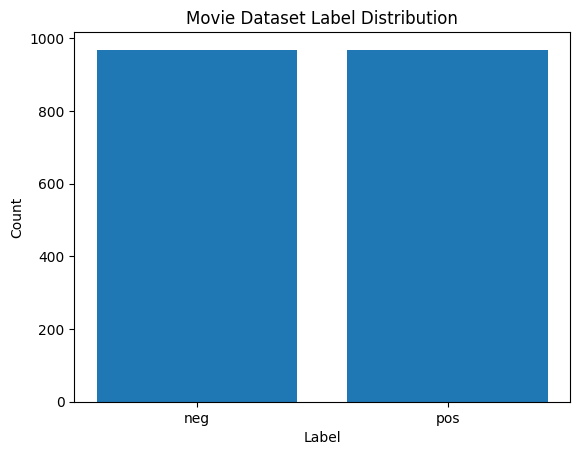

In [8]:
import matplotlib.pyplot as plt
labelcount=df['label'].value_counts()
#create visualisation
plt.bar(labelcount.index,labelcount.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Movie Dataset Label Distribution')
plt.show()

## Split the data into train & test sets:

In [9]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Build pipelines to vectorize the data, then train and fit a model
Now that we have sets to train and test, we'll develop a selection of pipelines, each with a different model.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

## Feed the training data through the first pipeline
We'll run naïve Bayes first

In [11]:
text_clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Run predictions and analyze the results (naïve Bayes)

In [12]:
# Form a prediction set
predictions = text_clf_nb.predict(X_test)

In [13]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[287  21]
 [130 202]]


In [14]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.69      0.93      0.79       308
         pos       0.91      0.61      0.73       332

   micro avg       0.76      0.76      0.76       640
   macro avg       0.80      0.77      0.76       640
weighted avg       0.80      0.76      0.76       640



In [15]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7640625


Naïve Bayes gave us better-than-average results at 76.4% for classifying reviews as positive or negative based on text alone. Let's see if we can do better.

## Feed the training data through the second pipeline
Next we'll run Linear SVC

In [16]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

## Run predictions and analyze the results (Linear SVC)

In [17]:
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

In [18]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[259  49]
 [ 49 283]]


In [19]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

   micro avg       0.85      0.85      0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



In [20]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.846875


Accuracy score of 84.7% is not impressive enough. We have only 2000 movie reviews which is a relatively small dataset. We can add more data point and then run the model it might improve the accuracy.

## Feed new data into a trained model


### First, train the model

### Next, feed new data to the model's `predict()` method

In [13]:
new_data=pd.read_csv('moviereviews2.tsv', sep='\t')

In [14]:
# Check for the existence of NaN values in a cell:
Nullvalues=new_data.isnull().sum()
print('Null values are:\n', Nullvalues)
NullRate=((new_data.isnull().sum())/len(new_data))*100
print('Null rate is:', NullRate)

Null values are:
 label      0
review    20
dtype: int64
Null rate is: label     0.000000
review    0.333333
dtype: float64


In [15]:
new_data.dropna(inplace=True)

len(new_data)

5980

In [16]:
blanks = []  # start with an empty list

for i,lb,rv in new_data.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [17]:
#combining the datas
combine_data=pd.concat([df,new_data],ignore_index=True)

In [18]:

X = combine_data['review']
y = combine_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# # Naïve Bayes:
# text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
#                      ('clf', MultinomialNB()),
# ])

# # Linear SVC:
# text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
#                      ('clf', LinearSVC()),
# ])

# Naïve Bayes:

In [21]:
text_clf_nb.fit(X_train, y_train)
from sklearn import metrics
# Form a prediction set
predictions = text_clf_nb.predict(X_test)

# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

print("\n")

# Print a classification report
print(metrics.classification_report(y_test,predictions))

print("\n")

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[1219   64]
 [ 260 1070]]


              precision    recall  f1-score   support

         neg       0.82      0.95      0.88      1283
         pos       0.94      0.80      0.87      1330

    accuracy                           0.88      2613
   macro avg       0.88      0.88      0.88      2613
weighted avg       0.88      0.88      0.88      2613



0.8760045924225028


# SVC:

In [22]:
text_clf_lsvc.fit(X_train, y_train)
from sklearn import metrics
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

# Report the confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

print("\n")

# Print a classification report
print(metrics.classification_report(y_test,predictions))

print("\n")

# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

[[1159  124]
 [ 108 1222]]


              precision    recall  f1-score   support

         neg       0.91      0.90      0.91      1283
         pos       0.91      0.92      0.91      1330

    accuracy                           0.91      2613
   macro avg       0.91      0.91      0.91      2613
weighted avg       0.91      0.91      0.91      2613



0.9112131649445082


An accuracy of 91% has been achieved for the movie review dataset.